## Regresion Polinomial & Feature engineering

In [2]:
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib as mp
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('winequality-red.csv')

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

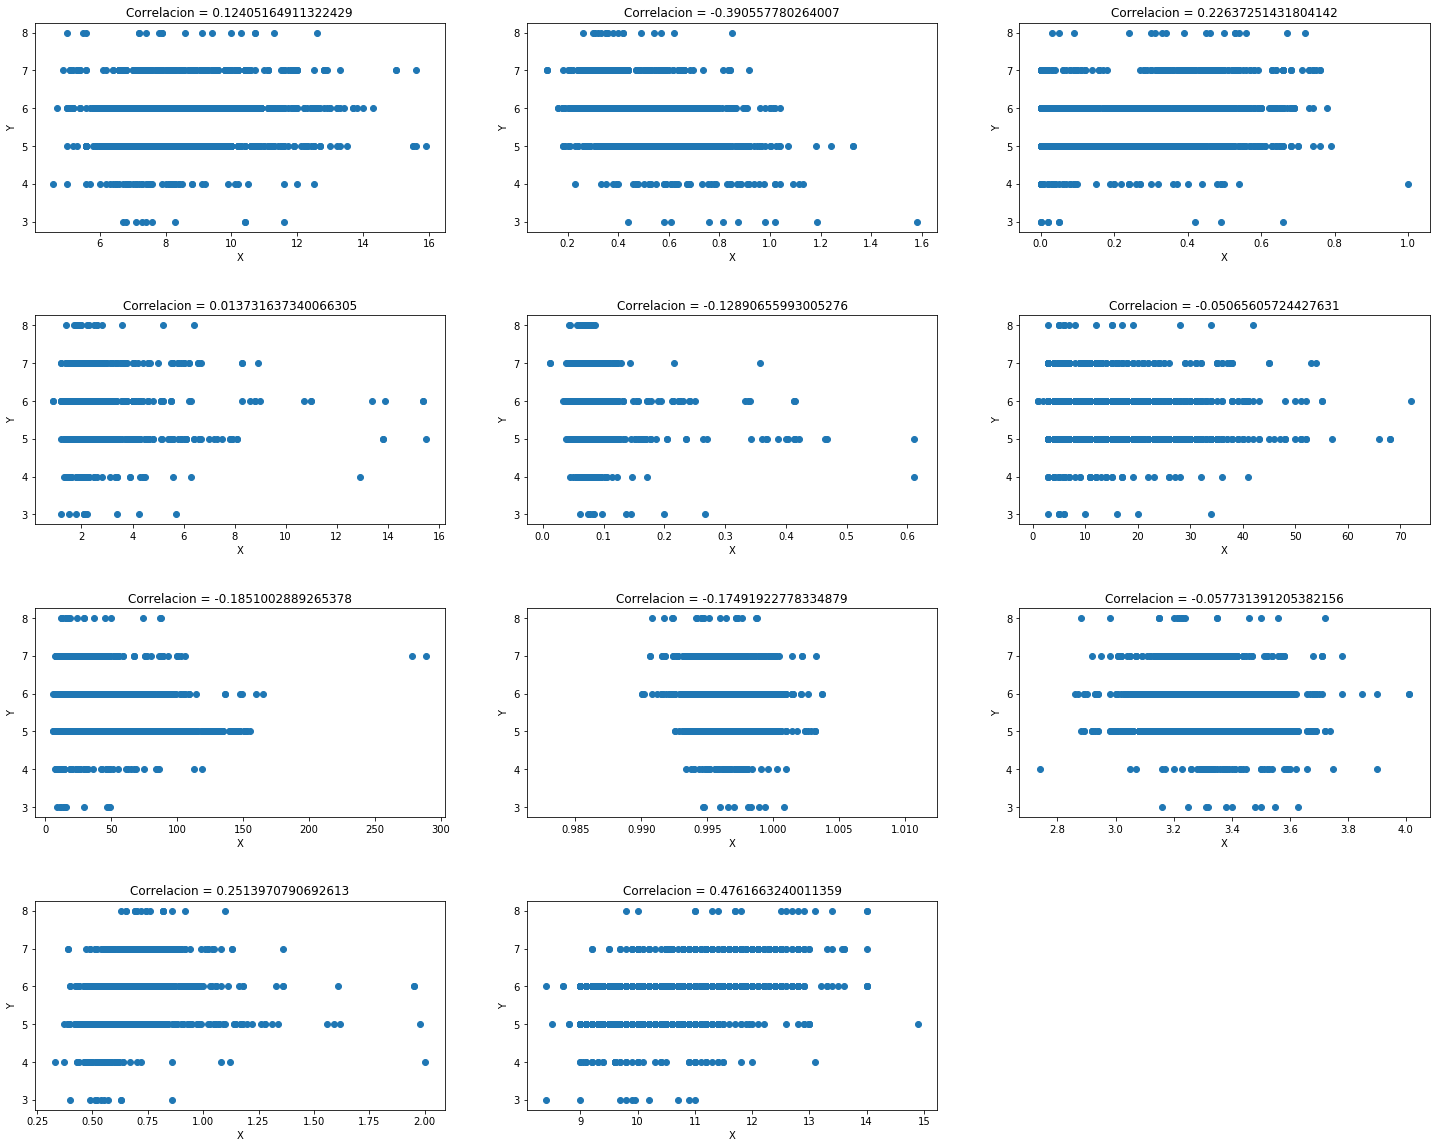

In [5]:

fig = plt.figure()
fig.set_size_inches(25, 20)
fig.subplots_adjust(hspace=0.4, wspace=0.2)

for i in range(1, 12):
    plt.subplot(4, 3, i)
    corrcoef = np.corrcoef(data.iloc[:, i-1], data['quality'])
    plt.title('Correlacion = ' + str(corrcoef[0,1]))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.scatter(data.iloc[:, i-1], data['quality'])


In [47]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
observaciones = 100

Y_hat = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, 2):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_hat = tf.add(tf.multiply(tf.pow(X, i), W), Y_hat)

cost = tf.reduce_mean(tf.pow(Y_hat - Y, 2)) / 2

learning_rate = 0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

n_epochs = 1000

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch_i in range(n_epochs):
        sess.run(optimizer, feed_dict={X: data.iloc[:, 11], Y: data['quality']})
    
        training_cost = sess.run(cost, feed_dict={X: data.iloc[:, 11], Y: data['quality']})
    
        if epoch_i % 10 == 0:
            print(training_cost)

        if np.abs(training_cost) < 0.0001:
            break


0.036176693
0.03568669
0.035431653
0.035295337
0.035219762
0.035174627
0.03514482
0.03512307
0.03510522
0.035089474
0.035074692
0.03506038
0.035046637
0.035032697
0.035019055
0.03500533
0.034991596
0.034977913
0.03496427
0.03495061
0.034937147
0.03492337
0.034909803
0.03489617
0.03488261
0.034868907
0.034855176
0.034841746
0.034828003
0.03481449
0.034800872
0.034787375
0.034773674
0.034760203
0.034746483
0.03473303
0.03471956
0.03470588
0.034692373
0.034678884
0.03466536
0.03465184
0.034638323
0.034624714
0.034611195
0.03459772
0.034584142
0.03457063
0.03455719
0.034543604
0.034530167
0.034516737
0.03450321
0.034489915
0.034476522
0.034462906
0.034449566
0.034436047
0.0344226
0.03440919
0.034395788
0.034382246
0.03436877
0.03435548
0.034341905
0.034328625
0.03431533
0.034301754
0.034288473
0.03427514
0.034261752
0.034248337
0.034235027
0.034221772
0.034208324
0.03419499
0.034181636
0.03416822
0.034155052
0.034141615
0.03412831
0.034114882
0.034101598
0.034088206
0.034075018
0.034061793